In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("GE_2024_Results.csv")

In [4]:
data.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [5]:
data.tail()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
8897,8898,West Bengal,Uluberia,SK. SAPIYAR ALI,Independent,2924,-,2924,0.21,Lost
8898,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107,0.15,Lost
8899,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000,0.14,Lost
8900,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572,0.11,Lost
8901,8902,West Bengal,Uluberia,NOTA,None of the Above,11263,55,11318,0.81,Lost


In [8]:
data.sum()

ID                                                       39627253
State           Andaman & Nicobar IslandsAndaman & Nicobar Isl...
Constituency    Andaman & Nicobar IslandsAndaman & Nicobar Isl...
Candidate       BISHNU PADA RAYKULDEEP RAI SHARMAMANOJ PAULD A...
Party           Bharatiya Janata PartyIndian National Congress...
EVM Votes       1021827782982366009219591171453950637834934218...
Postal Votes    2542111888353122-71083244235591865374621972310...
Total Votes                                             645363445
% of Votes      50.5838.544.082.971.090.450.360.270.250.190.17...
Result          WonLostLostLostLostLostLostLostLostLostLostLos...
dtype: object

In [9]:
data.isnull()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8897,False,False,False,False,False,False,False,False,False,False
8898,False,False,False,False,False,False,False,False,False,False
8899,False,False,False,False,False,False,False,False,False,False
8900,False,False,False,False,False,False,False,False,False,False


**Basic Statistics and Data Cleaning**

In [15]:
data.describe()

,ID,Total Votes
count,8902.000000,8.902000e+03
mean,4451.500000,7.249646e+04
std,2569.930382,1.798988e+05
min,1.000000,0.000000e+00
25%,2226.250000,1.094250e+03
50%,4451.500000,2.781000e+03
75%,6676.750000,9.759500e+03
max,8902.000000,1.471885e+06


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            8902 non-null   int64 
 1   State         8902 non-null   object
 2   Constituency  8902 non-null   object
 3   Candidate     8902 non-null   object
 4   Party         8902 non-null   object
 5   EVM Votes     8902 non-null   object
 6   Postal Votes  8902 non-null   object
 7   Total Votes   8902 non-null   int64 
 8   % of Votes    8902 non-null   object
 9   Result        8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


In [18]:
data.isnull().sum()

ID              0
State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
Result          0
dtype: int64

**Convert Data Types**

In [25]:
data['EVM Votes'] = pd.to_numeric(data['EVM Votes'],errors=('coerce'))
data['Total Votes'] = pd.to_numeric(data["Total Votes"],errors=('coerce'))
data['Postal Votes']=pd.to_numeric(data['Postal Votes'],errors=('coerce'))

In [31]:
data['% of Votes'] = data['% of Votes'].str.rstrip('%')  # Remove the '%' symbol

# Replace invalid entries with NaN and convert to float
data['% of Votes'] = pd.to_numeric(data['% of Votes'], errors='coerce')

# Drop rows with NaN values in `% of Votes`
data = data.dropna(subset=['% of Votes'])

# Convert the cleaned column to a percentage (0-1 scale)
data['% of Votes'] = data['% of Votes'] / 100.0

C:\Users\moham\AppData\Local\Temp\ipykernel_15668\1124916565.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['% of Votes'] = data['% of Votes'] / 100.0


In [32]:
data.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436,0.5058,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040,0.3854,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254,0.0408,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017,0.0297,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203,0.0109,Lost


**Vote Analysis**


In [38]:
party_votes = data.groupby('Party')['Total Votes'].sum().reset_index()

In [39]:
party_votes

,Party,Total Votes
0,AARAKSHAN VIRODHI PARTY,1444
1,AJSU Party,458677
2,Aadarsh Mithila Party,29550
3,Aadarsh Sangram Party,865
4,Aadi Bharat Party,742
...,...,...
741,Yuva Krantikari Party,8736
742,Yuva Taram Party,1369
743,Yuva Vikas Party,1679
744,Yuvajana Sramika Rythu Congress Party,13316039


In [41]:
print(party_votes.sort_values(by='Total Votes', ascending=False))

                                         Party  Total Votes
158                     Bharatiya Janata Party    235973935
289                   Indian National Congress    136759064
617                            Samajwadi Party     29549381
69                All India Trinamool Congress     28213393
282                                Independent     17844442
..                                         ...          ...
563                   Rashtriya Mangalam Party          257
555  Rashtriya Jatigat Aarakshan Virodhi Party          215
57      All India Backward People Sunami Party          210
692       Telangana Prajaa Jeevana Rythu Party          141
296                      Indian Praja Congress          141

[746 rows x 2 columns]


**Party Performance**

In [48]:
constituencies_won = data[data['Result'] == 'Won'].groupby('Party').size().reset_index(name='Constituencies Won')

In [49]:
constituencies_won.sort_values(by='Constituencies Won',ascending = False)

,Party,Constituencies Won
8,Bharatiya Janata Party,239
15,Indian National Congress,99
31,Samajwadi Party,37
4,All India Trinamool Congress,29
12,Dravida Munnetra Kazhagam,22
36,Telugu Desam,16
20,Janata Dal (United),12
34,Shiv Sena (Uddhav Balasaheb Thackrey),9
26,Nationalist Congress Party – Sharadchandra Pawar,8
33,Shiv Sena,7


**Geographical Analysis**

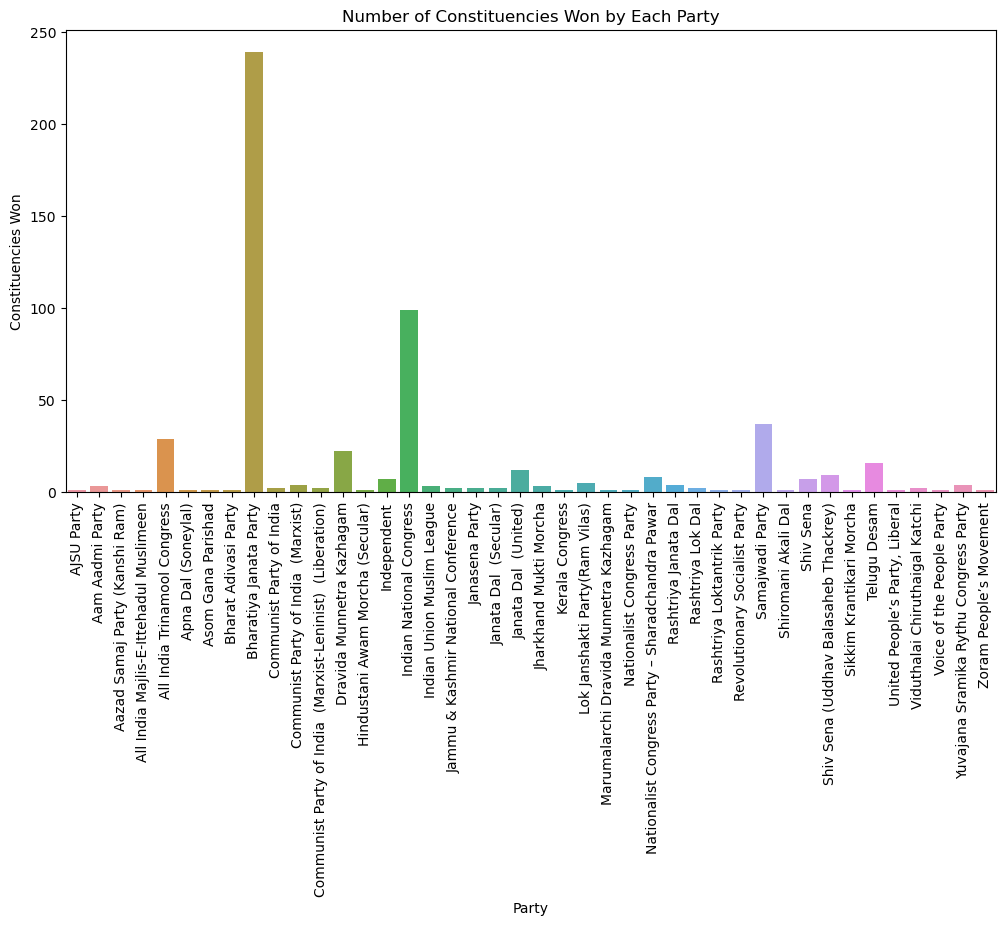

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of constituencies won by each party
plt.figure(figsize=(12, 6))
sns.barplot(data=constituencies_won, x='Party', y='Constituencies Won')
plt.xticks(rotation=90)
plt.title('Number of Constituencies Won by Each Party')
plt.show()

**Candidate Analysis**

In [52]:
# Candidates with the highest percentage of votes
top_candidates = data.nlargest(10, '% of Votes')[['Candidate', 'Party', 'Constituency', '% of Votes']]

# Candidates with the lowest percentage of votes
bottom_candidates = data.nsmallest(10, '% of Votes')[['Candidate', 'Party', 'Constituency', '% of Votes']]

# Display the results
print(top_candidates)
print(bottom_candidates)


                          Candidate                         Party  \
3289                SHANKAR LALWANI        Bharatiya Janata Party   
1664                      C R PATIL        Bharatiya Janata Party   
3522          SHIVRAJ SINGH CHOUHAN        Bharatiya Janata Party   
1590                      AMIT SHAH        Bharatiya Janata Party   
7352               BIPLAB KUMAR DEB        Bharatiya Janata Party   
1753               DR. HEMANG JOSHI        Bharatiya Janata Party   
1679  RAJPALSINH MAHENDRASINH JADAV        Bharatiya Janata Party   
7342           KRITI DEVI DEBBARMAN        Bharatiya Janata Party   
3441              DR. LATA WANKHEDE        Bharatiya Janata Party   
8565              ABHISHEK BANERJEE  All India Trinamool Congress   

         Constituency  % of Votes  
3289           INDORE      0.7854  
1664          Navsari      0.7705  
3522          VIDISHA      0.7670  
1590      Gandhinagar      0.7648  
7352     Tripura West      0.7285  
1753         Vadodara   

**Correlation Analysis**

In [54]:
# Correlation between EVM votes and postal votes
correlation = data[['EVM Votes', 'Postal Votes']].corr()

# Display the correlation matrix
print(correlation)

              EVM Votes  Postal Votes
EVM Votes      1.000000      0.763628
Postal Votes   0.763628      1.000000
